## Time Series Data Analysis
Problem statement: Analysis and Visualization of Stock Market Data
Dataset: "Stock_Prices.csv"
Description: The dataset contains historical stock price data for a particular company over a 
period of time. It includes attributes such as date, closing price, volume, and other relevant 
features. The goal is to perform time series data analysis on the stock price data to identify 
trends, patterns, and potential predictors, as well as build models to forecast future stock 
prices.
Tasks to Perform:
1. Import the "Stock_Prices.csv" dataset.
2. Explore the dataset to understand its structure and content.
3. Ensure that the date column is in the appropriate format (e.g., datetime) for time series 
analysis.
4. Plot line charts or time series plots to visualize the historical stock price trends over 
time.
5. Calculate and plot moving averages or rolling averages to identify the underlying
trends and smooth out noise.
6. Perform seasonality analysis to identify periodic patterns in the stock prices, such as 
weekly, monthly, or yearly fluctuations.
7. Analyze and plot the correlation between the stock prices and other variables, such as 
trading volume or market indices.
8. Use autoregressive integrated moving average (ARIMA) models or exponential 
smoothing models to forecast future stock prices

In [3]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("stockmarket.csv")
df.head()

,date,open,high,low,close,volume,dividend_amount
0,2005-01-03,388.7685,407.0464,388.7685,405.9997,11842921.0,0.0
1,2005-01-04,399.9444,407.3827,395.8329,396.8048,10059943.0,0.0
2,2005-01-05,392.8427,399.1970,385.9277,396.1319,16954266.0,0.0
3,2005-01-06,392.4690,401.0658,390.6747,393.1791,13446517.0,0.0
4,2005-01-07,394.7115,409.2889,394.3751,404.3176,16969845.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4083 entries, 0 to 4082
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             4083 non-null   object 
 1   open             4083 non-null   float64
 2   high             4083 non-null   float64
 3   low              4083 non-null   float64
 4   close            4083 non-null   float64
 5   volume           4083 non-null   float64
 6   dividend_amount  4083 non-null   float64
dtypes: float64(6), object(1)
memory usage: 223.4+ KB


In [9]:
df.isnull().sum()

date               0
open               0
high               0
low                0
close              0
volume             0
dividend_amount    0
dtype: int64

In [13]:
# Convert the 'Date' column to datetime
df['date'] = pd.to_datetime(df['date'])

In [15]:
# 3. Set 'Date' as the index for easier time series plotting
df.set_index('date', inplace=True)


In [17]:
# Verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4083 entries, 2005-01-03 to 2021-07-30
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   open             4083 non-null   float64
 1   high             4083 non-null   float64
 2   low              4083 non-null   float64
 3   close            4083 non-null   float64
 4   volume           4083 non-null   float64
 5   dividend_amount  4083 non-null   float64
dtypes: float64(6)
memory usage: 223.3 KB


In [19]:
df.head()

,open,high,low,close,volume,dividend_amount
date,,,,,,
2005-01-03,388.7685,407.0464,388.7685,405.9997,11842921.0,0.0
2005-01-04,399.9444,407.3827,395.8329,396.8048,10059943.0,0.0
2005-01-05,392.8427,399.1970,385.9277,396.1319,16954266.0,0.0
2005-01-06,392.4690,401.0658,390.6747,393.1791,13446517.0,0.0
2005-01-07,394.7115,409.2889,394.3751,404.3176,16969845.0,0.0


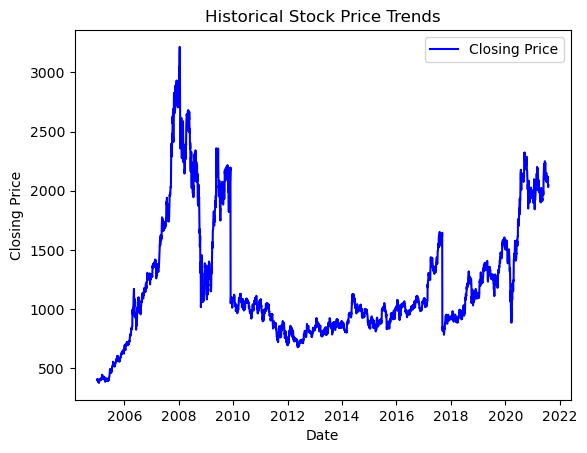

In [27]:
#4 . Plot line charts or time series plots to visualize the historical stock price trends over time
import matplotlib.pyplot as plt

# Plot closing price over time
plt.plot(df['close'], color='blue', label='Closing Price')
plt.title('Historical Stock Price Trends')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


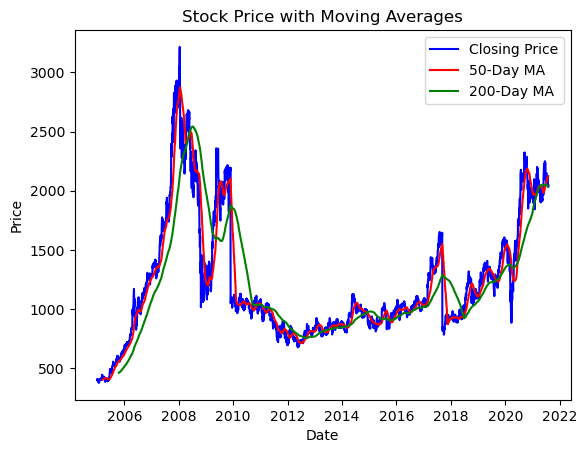

In [35]:
# 5. Calculate and plot moving averages or rolling averages to identify the underlying trends and smooth out noise.
# Calculate moving averages
df['MA_50'] = df['close'].rolling(window=50).mean()
df['MA_200'] = df['close'].rolling(window=200).mean()

# Plot closing price along with moving averages
plt.plot(df['close'], color='blue', label='Closing Price')
plt.plot(df['MA_50'], color='red', label='50-Day MA')
plt.plot(df['MA_200'], color='green', label='200-Day MA')
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


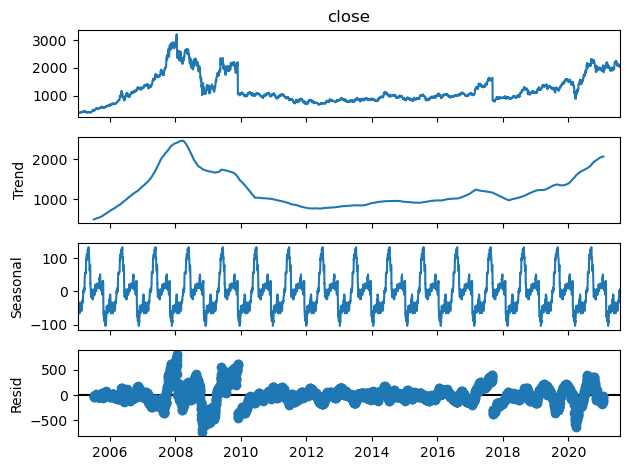

In [39]:
# Perform seasonality analysis to identify periodic patterns in the stock prices, such as weekly, monthly, or yearly fluctuations
import seaborn as sns

# Decompose the time series for seasonality analysis
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the series
decomposition = seasonal_decompose(df['close'], model='additive', period=252)  # assuming 252 trading days in a year
decomposition.plot()
plt.show()


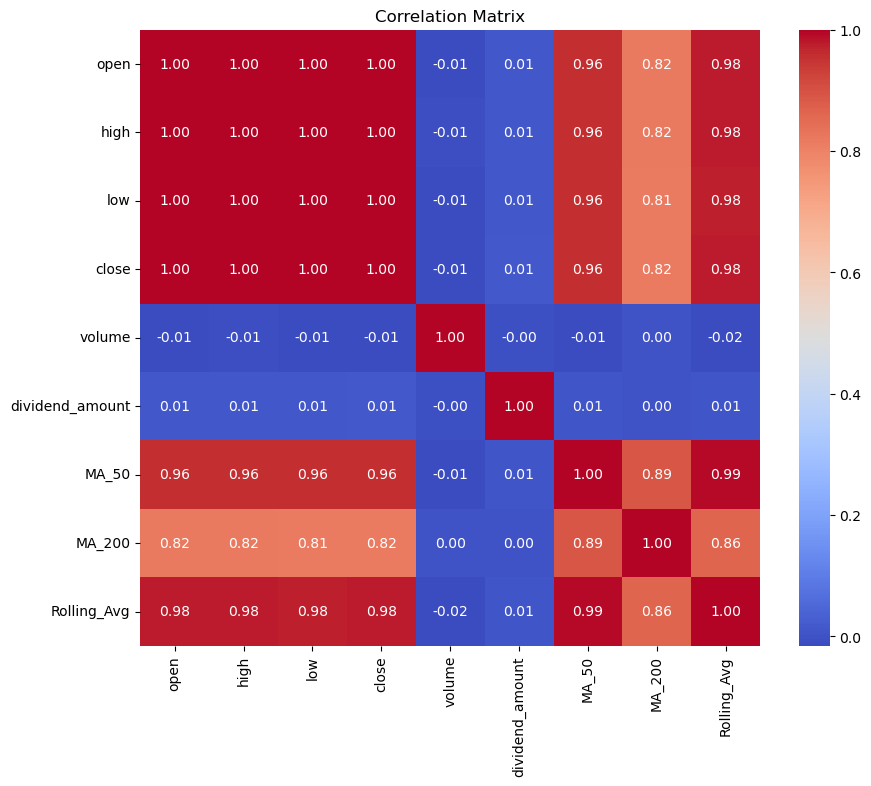

In [59]:
#  Analyze and plot the correlation between the stock prices and other variables, such as trading volume or market indices
# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [43]:
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot

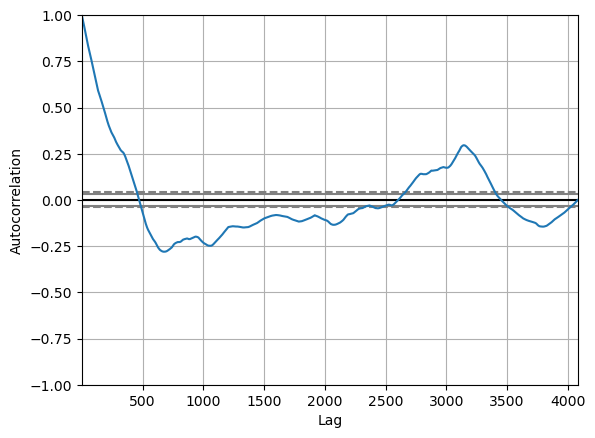

In [61]:
#  Use autoregressive integrated moving average (ARIMA) models or exponential smoothing models to forecast future stock prices
# Plot autocorrelation to determine if ARIMA is suitable
autocorrelation_plot(df['close'])
plt.show()


In [51]:
# Fit ARIMA model
model = ARIMA(df['close'], order=(5, 1, 0))  # ARIMA order (p, d, q) can be optimized further
arima_model = model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [53]:
# Forecast future prices
forecast = arima_model.forecast(steps=30)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


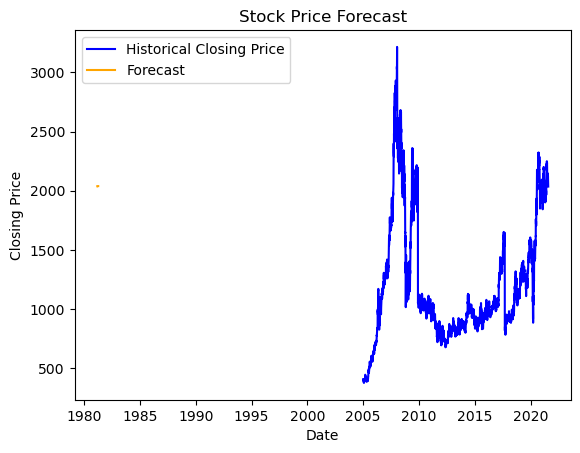

In [57]:
# Plot the forecast along with historical data
#plt.figure(figsize=(14, 7))
plt.plot(df['close'], color='blue', label='Historical Closing Price')
plt.plot(forecast, color='orange', label='Forecast')
plt.title('Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()